In [1]:
from PIL import Image

from src.eunms import Model_Type, Scheduler_Type
from src.utils.enums_utils import get_pipes
from src.config import RunConfig

from main import run as invert

/cortex/users/yairshp/miniconda3/envs/nri/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/cortex/users/yairshp/miniconda3/envs/nri/lib/python3.10/site-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


ModuleNotFoundError: No module named 'third_party'

In [2]:
device = "cuda:0"

In [3]:
model_type = Model_Type.SDXL_Turbo
scheduler_type = Scheduler_Type.EULER
pipe_inversion, pipe_inference = get_pipes(model_type, scheduler_type, device=device)

/cortex/users/yairshp/miniconda3/envs/renoise_inversion/lib/python3.11/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Keyword arguments {'safety_checker': None} are not expected by StableDiffusionXLImg2ImgPipeline and will be ignored.
Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  6.22it/s]


In [46]:
# input_image = Image.open("example_images/lion.jpeg").convert("RGB").resize((512, 512))
input_image = (
    Image.open(
        "/cortex/users/yairshp/data/imagenhub/subject_driven_image_editing/swap_anything_format/0/pink_sunglasses.jpg"
    )
    .convert("RGB")
    .resize((512, 512))
)
# prompt = "a lion in the field"
prompt = "a photo of a sunglasses"
# prompt = "a photo of a lion"

In [47]:
config = RunConfig(model_type=model_type, scheduler_type=scheduler_type)

In [48]:
edit_img, inv_latent, noise, all_latents = invert(
    input_image,
    prompt,
    config,
    pipe_inversion=pipe_inversion,
    pipe_inference=pipe_inference,
    do_reconstruction=True,
    edit_prompt="a photo of a sunglasses",
    #  edit_prompt="a tiger in the field",
    # edit_prompt="a photo of a lion",
)

Inverting...


100%|██████████| 4/4 [00:04<00:00,  1.10s/it]


Generating...


100%|██████████| 4/4 [00:00<00:00, 18.64it/s]


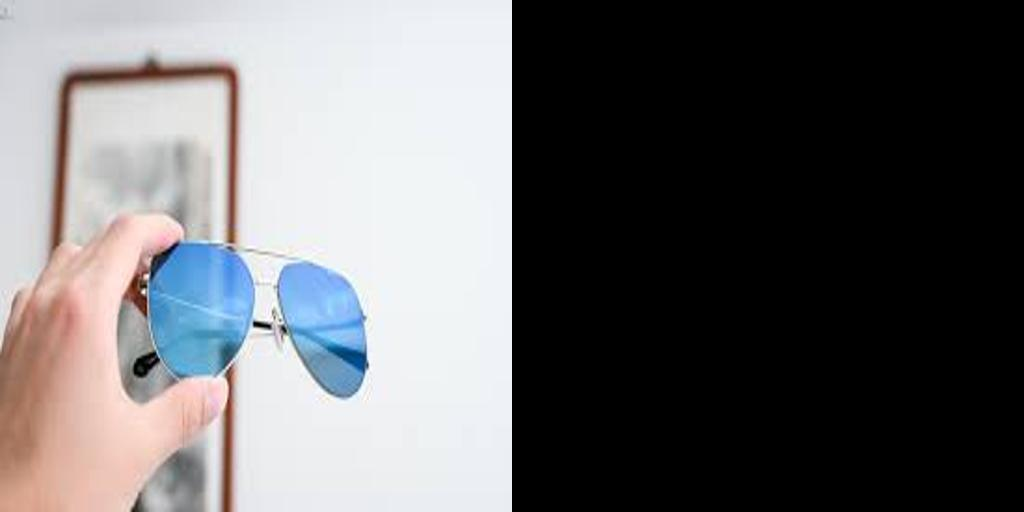

In [49]:
from diffusers.utils import make_image_grid

make_image_grid([input_image, edit_img], 1, 2)